In [5]:
import tensorflow as tf
import os
num_gpu = len(tf.config.experimental.list_physical_devices('GPU'))
print(f'Número de GPUs: {num_gpu}')
assert num_gpu > 0

Número de GPUs: 1


In [6]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



In [7]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
!pip install transformers
!pip install gradio
!pip install tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 75.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets

**Adquirindo dados**

In [10]:
reviews_dataset = tensorflow_datasets.load('amazon_us_reviews/Mobile_Electronics_v1_00', split='train', shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incomplete7VKMPV/amazon_u…

Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


## **Explorando dados**

In [11]:
reviews_dataset = tensorflow_datasets.as_dataframe(reviews_dataset)
reviews_dataset.head()

,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
0,b'20980074',0,b'US',b'Mobile_Electronics',b'B00D1847NE',b'274617424',b'Teenage Mutant Ninja Turtles Boombox CD Play...,b'Does not work',b'2015-01-09',b'One Star',b'R1OVS0D6SEXPW7',1,0,0,1
1,b'779273',0,b'US',b'Mobile_Electronics',b'B00KMO6DYG',b'397452138',b'4 Gauge Amp Kit Amplifier Install Wiring Com...,b'This is a great wiring kit i used it to set ...,b'2015-08-06',b'Great kit',b'R9VSD0ET8FERB',4,0,0,1
2,b'15410531',0,b'US',b'Mobile_Electronics',b'B000GWLL0K',b'948304826',b'Travel Wall Charger fits Creative Zen Vision...,b'It works great so much faster than USB charg...,b'2007-03-15',b'A/C Charger for Creative Zen Vision M',b'R3ISXCZHWLJLBH',5,0,0,1
3,b'27389005',0,b'US',b'Mobile_Electronics',b'B008L3JE6Y',b'466340015',b'High Grade Robust 360\xc2\xb0 Adjustable Car...,b'This product was purchased to hold a monitor...,b'2013-07-30',b'camera stand',b'R1TWVUDOFJSQAW',5,0,0,1
4,b'2663569',0,b'US',b'Mobile_Electronics',b'B00GHZS4SC',b'350592810',b'HDE Multifunctional Bluetooth FM Audio Car K...,"b""it works but it has really bad sound quality...",b'2014-12-31',b'bad sound quality',b'R2PEOEUR1LP0GH',3,0,0,1


In [12]:
reviews_principal_data = reviews_dataset.loc[:, ('data/review_body', 'data/star_rating')]
reviews_principal_data.rename(columns={'data/review_body' : 'review_body', 'data/star_rating' : 'star_rating'}, inplace=True)
reviews_principal_data.head()

,review_body,star_rating
0,b'Does not work',1
1,b'This is a great wiring kit i used it to set ...,4
2,b'It works great so much faster than USB charg...,5
3,b'This product was purchased to hold a monitor...,5
4,"b""it works but it has really bad sound quality...",3


In [13]:
reviews_principal_data.shape

(104975, 2)

In [14]:
rating_count = reviews_principal_data.loc[:, ('star_rating')].value_counts()
print(rating_count)

5    52255
4    18088
1    17587
3     9734
2     7311
Name: star_rating, dtype: int64


<Axes: xlabel='star_rating', ylabel='count'>

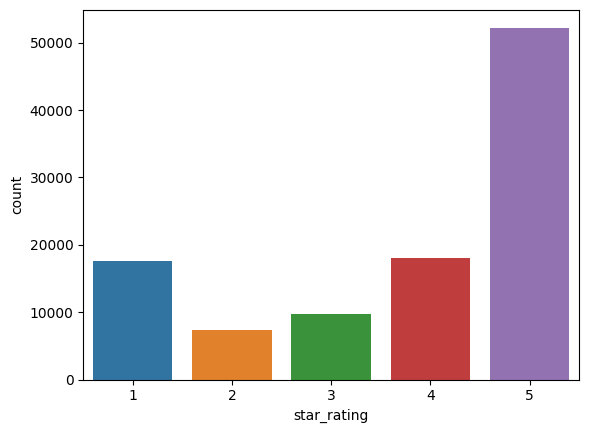

In [15]:
sns.countplot(data=reviews_principal_data, x='star_rating')

In [16]:
reviews_principal_data = reviews_principal_data.sample(frac=.5, random_state=41)
reviews_principal_data.shape

(52488, 2)

## **Preprocessamento**

In [17]:
reviews_principal_data['sentiment'] = reviews_principal_data.loc[:, ('star_rating')].apply(lambda rating: 2 if rating>3 else(0 if rating<3 else 1))
reviews_principal_data.head()

,review_body,star_rating,sentiment
76841,b'This is cute and functional also good value ...,4,2
89556,b'Great product. Reasonable price. Quick deliv...,5,2
23642,"b""These work really well. We had a set before ...",4,2
92963,"b""I use this Sony in my garage workshop. It's...",5,2
13593,"b'Its a terrific radio, we took it camping and...",4,2


In [18]:
# Notas convertidas em positivas, neutras e negativas (2, 1, 0)

reviews_principal_data.drop(columns=['star_rating'], inplace=True)
reviews_principal_data.head()

,review_body,sentiment
76841,b'This is cute and functional also good value ...,2
89556,b'Great product. Reasonable price. Quick deliv...,2
23642,"b""These work really well. We had a set before ...",2
92963,"b""I use this Sony in my garage workshop. It's...",2
13593,"b'Its a terrific radio, we took it camping and...",2


In [19]:
reviews_principal_data['review_body'] = reviews_principal_data.loc[:, ('review_body')].str.decode('utf-8')
reviews_principal_data['review_body'] = reviews_principal_data.loc[:, ('review_body')].apply(str.lower)
reviews_principal_data.head()

,review_body,sentiment
76841,this is cute and functional also good value fo...,2
89556,great product. reasonable price. quick deliver...,2
23642,these work really well. we had a set before an...,2
92963,i use this sony in my garage workshop. it's a...,2
13593,"its a terrific radio, we took it camping and i...",2


In [20]:
reviews_principal_data.loc[:, ('sentiment')].value_counts()

2    35191
0    12433
1     4864
Name: sentiment, dtype: int64

In [21]:
positive = reviews_principal_data.loc[reviews_principal_data['sentiment'] == 2].sample(n=4864, random_state=41)
negative = reviews_principal_data.loc[reviews_principal_data['sentiment'] == 0].sample(n=4864, random_state=41)
neutral = reviews_principal_data.loc[reviews_principal_data['sentiment'] == 1]

train_data = pd.concat([positive, negative, neutral]).sample(frac=1).reset_index(drop=True)
train_data.loc[:, ('sentiment')].value_counts()

0    4864
2    4864
1    4864
Name: sentiment, dtype: int64

In [22]:
reviews = train_data.loc[:, ('review_body')].to_list()
classes = train_data.loc[:, ('sentiment')].to_list()

print(f'Exemplos:\n{reviews[12:17]}\n{classes[12:17]}')

Exemplos:
["the cable seemed great at first, worked and i didn't get a message that it was not an approved device.  then after one week it stopped working and the message started popping up that it was not approved.  weird.", "hello users...    i've been using this product now over a week. at first it was hard to figure out the functions with out a manual. after reading a few comments and playing around with the device i was able to get it to work. now i'm going to share to you what other haven't.     1. how to setup the device to work with your car radio. pick any station on the device make sure your radio has the same station as the device so it can link. for sample your device is preset to 87.5 your radio station is at 87.5. preset is at 87.5 if you car radio has 87.5 use that station; if not pick other stations.    2. i have a 10 speaker system in my car, it gives me a very high pitch sound when it just starts. after a warm up it slowly goes away. my car deck player comes with mp3 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(reviews, classes, test_size=.25, random_state=41)


**Preparando parâmetros do modelo**

In [25]:
from transformers import DistilBertTokenizerFast

#MODEL_NAME = 'distilbert-base-uncased-finetuned-sst-2-english'
MODEL_NAME = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)

In [26]:
MAX_LENGTH = 256
train_encodings = tokenizer(
                        X_train,
                        truncation=True,
                        padding=True,
                        return_tensors='tf',
                        max_length=MAX_LENGTH)
test_encodings = tokenizer(
                        X_test,
                        truncation=True,
                        padding=True,
                        return_tensors='tf',
                        max_length=MAX_LENGTH)

In [27]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test))

In [28]:
from transformers import TFDistilBertForSequenceClassification

## **Definindo modelo**

In [29]:
model = TFDistilBertForSequenceClassification.from_pretrained(
                        pretrained_model_name_or_path=MODEL_NAME,
                        num_labels=3
                        )



Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_transform', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [31]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [32]:
model.compile(
      optimizer=optimizer,
      loss=loss_func,
      metrics=['accuracy'])

In [33]:
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,779
Trainable params: 66,955,779
Non-trainable params: 0
_________________________________________________________________


Treino

In [35]:
BATCH_SIZE = 16
NUM_EPOCHS = 5

model.fit(
      train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE),
      epochs=NUM_EPOCHS,
      batch_size=BATCH_SIZE,
      validation_data=test_dataset.shuffle(len(X_test)).batch(BATCH_SIZE)
)

Epoch 1/5
684/684 [==============================] - 309s 452ms/step - loss: 0.3174 - accuracy: 0.8804 - val_loss: 0.7248 - val_accuracy: 0.7401
Epoch 2/5
684/684 [==============================] - 310s 453ms/step - loss: 0.2008 - accuracy: 0.9272 - val_loss: 0.8183 - val_accuracy: 0.7429
Epoch 3/5
684/684 [==============================] - 309s 452ms/step - loss: 0.1343 - accuracy: 0.9524 - val_loss: 0.8633 - val_accuracy: 0.7248
Epoch 4/5
684/684 [==============================] - 310s 453ms/step - loss: 0.1001 - accuracy: 0.9654 - val_loss: 1.0325 - val_accuracy: 0.7377
Epoch 5/5
684/684 [==============================] - 318s 464ms/step - loss: 0.0854 - accuracy: 0.9706 - val_loss: 1.1002 - val_accuracy: 0.7346
